# Notes

This notebook contains codes for metacell-based correlation analysis between NT score and gene expression related to Fig. S11, Additional file 4: Table S3

# Load Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib as mpl
mpl.rcParams['pdf.fonttype'] = 42
mpl.rcParams['ps.fonttype'] = 42
mpl.rcParams['font.sans-serif'] = 'Arial'
import matplotlib.pyplot as plt
import seaborn as sns
from pprint import pprint
%matplotlib inline

In [2]:
from optparse import Values

In [3]:
from ONTraC.analysis.data import AnaData
from ONTraC.utils import write_version_info

write_version_info()

##################################################################################

         ▄▄█▀▀██   ▀█▄   ▀█▀ █▀▀██▀▀█                   ▄▄█▀▀▀▄█
        ▄█▀    ██   █▀█   █     ██    ▄▄▄ ▄▄   ▄▄▄▄   ▄█▀     ▀
        ██      ██  █ ▀█▄ █     ██     ██▀ ▀▀ ▀▀ ▄██  ██
        ▀█▄     ██  █   ███     ██     ██     ▄█▀ ██  ▀█▄      ▄
         ▀▀█▄▄▄█▀  ▄█▄   ▀█    ▄██▄   ▄██▄    ▀█▄▄▀█▀  ▀▀█▄▄▄▄▀

                        version: 1.2.0

##################################################################################


In [4]:
from ONTraC.analysis.trajectory import (construct_meta_cell_along_trajectory,
                                        plot_scatter_feat_along_trajectory,
                                        plot_cell_type_composition_along_trajectory_from_anadata,
                                        plot_cell_type_composition_along_trajectory)

# Load Data

## download dataset

In [6]:
import requests

# URL of the file
url = "https://zenodo.org/records/15571644/files/Stereo_seq_data.zip"

# Local file path to save the file
file_path = "./Stereo_seq_data.zip"

try:
    # Send a GET request to the URL
    response = requests.get(url)
    response.raise_for_status()  # Check if the request was successful

    # Write the content to the file
    with open(file_path, "wb") as file:
        file.write(response.content)

    print(f"File downloaded and saved to {file_path}")
except requests.exceptions.RequestException as e:
    print(f"An error occurred: {e}")


File downloaded and saved to ./Stereo_seq_data.zip


In [7]:
import zipfile

# Path to the zip file
zip_file_path = "Stereo_seq_data.zip"

# Directory where files will be extracted
extract_to_path = "./"

try:
    # Open the zip file
    with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
        # Extract all files to the specified directory
        zip_ref.extractall(extract_to_path)

    print(f"Files extracted to '{extract_to_path}'")
except zipfile.BadZipFile:
    print("The file is not a valid zip file.")


Files extracted to './'


## ONTraC output

In [8]:
vis_options = Values()
vis_options.NN_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NN/'
vis_options.GNN_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_GNN/'
vis_options.NT_dir = './Stereo_seq_data/ONTraC_output/stereo_midbrain_base_NT/'
vis_options.reverse = True
vis_options.output = None

In [9]:
ana_data = AnaData(vis_options)

In [10]:
ana_data.meta_data_df.head()

,Sample,Cell_Type,x,y
Cell_ID,,,,
E12_E1S3_100034,E12_E1S3,Fibro,15940.0,18584.0
E12_E1S3_100035,E12_E1S3,Fibro,15942.0,18623.0
E12_E1S3_100191,E12_E1S3,Endo,15965.0,18619.0
E12_E1S3_100256,E12_E1S3,Fibro,15969.0,18717.0
E12_E1S3_100264,E12_E1S3,Fibro,15974.0,18692.0


## gene expression

In [11]:
E14_RGC_scaled_exp = pd.read_csv('./Stereo_seq_data/source/stereo_seq_E14_RGC_scaled_exp.csv.gz', index_col=0)
E14_RGC_scaled_exp.head()

,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,0610031O16Rik,...,Zw10,Zwilch,Zwint,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3
Cell_ID,,,,,,,,,,,,,,,,,,,,,
E14_E1S3_171289,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,3.277203,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.091104,-0.068489,-0.389927,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425
E14_E1S3_171863,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,-0.307818,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.091104,-0.068489,-0.389927,-0.073764,9.345431,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425
E14_E1S3_171967,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,-0.307818,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.091104,-0.068489,-0.389927,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425
E14_E1S3_171983,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,2.074143,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.091104,-0.068489,-0.389927,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425
E14_E1S3_172013,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,-0.307818,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.091104,-0.068489,-0.389927,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425


# correlation between gene expression and NT score

In [12]:
# we are focuing on E14.5 RGCs
target_cells = ana_data.meta_data_df[(ana_data.meta_data_df['Cell_Type'] == 'RGC') & (ana_data.meta_data_df['Sample'] == 'E14_E1S3')]
E14_RGC_gene_exp_df = E14_RGC_scaled_exp.join(1 - ana_data.NT_score['Cell_NTScore'] if hasattr(ana_data.options, 'reverse')
                       and ana_data.options.reverse else ana_data.NT_score['Cell_NTScore'])

In [13]:
E14_RGC_gene_exp_metacell_data_df = construct_meta_cell_along_trajectory(meta_data_df = E14_RGC_gene_exp_df,
                                                                trajectory = 'Cell_NTScore',
                                                                n_cells = 10)
E14_RGC_gene_exp_metacell_data_df.head()


,0610005C13Rik,0610006L08Rik,0610009B22Rik,0610009O20Rik,0610010F05Rik,0610010K14Rik,0610012G03Rik,0610025J13Rik,0610030E20Rik,0610031O16Rik,...,Zwilch,Zwint,Zxdb,Zxdc,Zyg11a,Zyg11b,Zyx,Zzef1,Zzz3,Cell_NTScore
Cell_ID,,,,,,,,,,,,,,,,,,,,,
E14_E1S3_173789,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,-0.098032,0.516922,-0.025192,-0.088172,-0.008486,...,0.938360,0.371673,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,0.353277,0.000230
E14_E1S3_173259,-0.036511,-0.008535,-0.198124,-0.106792,0.117162,0.537851,-0.049493,-0.025192,-0.088172,-0.008486,...,-0.068489,0.011324,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,0.946734,-0.199425,0.000240
E14_E1S3_174106,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,-0.093338,0.008216,-0.025192,-0.088172,-0.008486,...,-0.068489,-0.117173,0.933613,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,0.234650,0.000250
E14_E1S3_173417,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,-0.064664,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.068489,-0.081511,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425,0.000266
E14_E1S3_173284,-0.036511,-0.008535,-0.198124,-0.106792,-0.239179,0.321239,-0.321011,-0.025192,-0.088172,-0.008486,...,-0.068489,-0.389927,-0.073764,-0.117644,-0.043855,-0.223836,-0.21233,-0.148131,-0.199425,0.000285


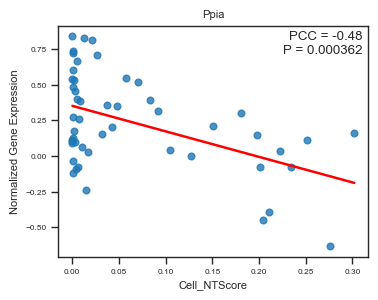

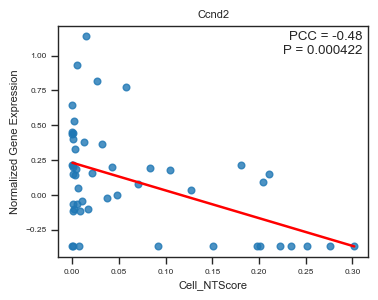

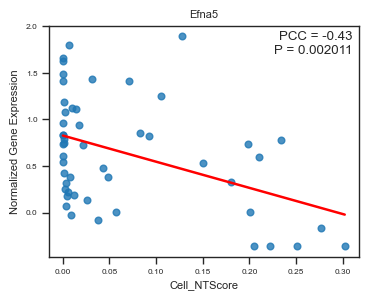

In [14]:
for gene in ['Ppia', 'Ccnd2', 'Efna5']:
    fig, ax = plot_scatter_feat_along_trajectory(
        data_df = E14_RGC_gene_exp_metacell_data_df,
        trajectory = 'Cell_NTScore',
        feature = gene,
        fit_reg = True,
        annotate_pos = 'upper right',
        figszie = (4,3),
        ylabel = 'Normalized Gene Expression',
    )

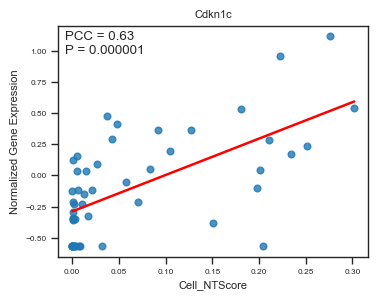

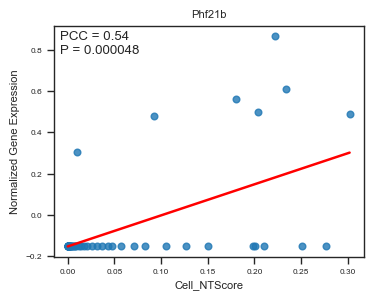

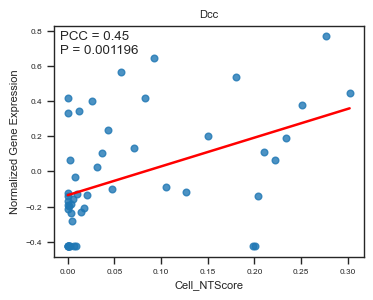

In [15]:
for gene in ['Cdkn1c', 'Phf21b', 'Dcc']:
    fig, ax = plot_scatter_feat_along_trajectory(
        data_df = E14_RGC_gene_exp_metacell_data_df,
        trajectory = 'Cell_NTScore',
        feature = gene,
        fit_reg = True,
        annotate_pos = 'upper left',
        figszie = (4,3),
        ylabel = 'Normalized Gene Expression',
    )

# Additional file 4: Table S3

In [16]:
from typing import List
from scipy.stats import spearmanr, pearsonr

def calculate_correlations(df, coordinate: str, genes: List[str]):
    correlations = []
    
    for var in genes:
        if df[var].isnull().values.any():
            print(f"Skipping {var} due to null values")
            continue
        
        a = df[coordinate].values  # Extract the 'A' column as a numpy array
        x = df[var].values   # Extract the current variable's column
        
        # Calculate Spearman's rho for this pair
        rho, p_val = pearsonr(a, x)
        
        correlations.append((var, rho, p_val))
    
    return pd.DataFrame(correlations, columns=['Variable', 'rho', 'p-value'])

In [17]:
corr_res = calculate_correlations(df=E14_RGC_gene_exp_metacell_data_df,
                                  coordinate='Cell_NTScore',
                                  genes=E14_RGC_scaled_exp.columns.tolist()
                                 )

/tmp/ipykernel_3440677/1738396462.py:16: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  rho, p_val = pearsonr(a, x)


In [18]:
corr_res = corr_res.dropna()
corr_res = corr_res.sort_values('rho')
corr_res.head()

,Variable,rho,p-value
17754,Ppia,-0.484622,0.000362
4024,Ccnd2,-0.479827,0.000422
22437,Tuba1b,-0.470727,0.000561
6339,Eif2s2,-0.456194,0.000870
14784,Mcm3,-0.453214,0.000949


In [19]:
corr_res.tail()

,Variable,rho,p-value
17244,Phf21b,0.542046,4.788367e-05
3172,Bbs9,0.550067,3.502920e-05
14090,Lbh,0.618297,1.712368e-06
10562,Gm3764,0.623302,1.333598e-06
4264,Cdkn1c,0.629617,9.666948e-07


In [20]:
corr_output = corr_res.copy()
corr_output = corr_output.set_index('Variable')
corr_output.columns = ['Correlation coefficient', 'P-value']

filtered_corr_output = corr_output[([True if abs(x) > 0.4 else False for x in corr_output['Correlation coefficient']]) & (corr_output['P-value'] < 0.01)].iloc[:,:2]
filtered_corr_output.head()


/tmp/ipykernel_3440677/1047327429.py:5: FutureWarning: Logical ops (and, or, xor) between Pandas objects and dtype-less sequences (e.g. list, tuple) are deprecated and will raise in a future version. Wrap the object in a Series, Index, or np.array before operating instead.
  filtered_corr_output = corr_output[([True if abs(x) > 0.4 else False for x in corr_output['Correlation coefficient']]) & (corr_output['P-value'] < 0.01)].iloc[:,:2]


,Correlation coefficient,P-value
Variable,,
Ppia,-0.484622,0.000362
Ccnd2,-0.479827,0.000422
Tuba1b,-0.470727,0.000561
Eif2s2,-0.456194,0.000870
Mcm3,-0.453214,0.000949


In [21]:
filtered_corr_output.to_csv('Table_S3.csv')